## Air Phase Cinematic in Rowing


La fase aerea en el remo de banco móvil consiste en un desplazamiento del remero hacia popa de su barco para recuperar una posicion encogida para poder volver a dar una palada y atacar. La correcta realizacion de esta fase (entre otros aspectos) diferencia un mejor de un peor remero. 

Es de especial relevancia la cinemática que sigue el remero a la hora de desplazarse hacia popa ya que es el momento en el que el barco va más rápido relativo al agua. Como cabe esperar los desplzamiento del remero sobre el barco afectan su desplazamiento relativo al agua. La intuición de los que saben refiere a un desplazamiento sin brusquedades. 
Recordar que la pérdida de velocidad (y potencia) en forma de rozamiento con el agua depende de la velocidad del barco, de ahí que la habilidad del remero en el desplazamiento a popa sea clave. Esto es posible "matematizarlo".

Considerar el sistema embarcacion+remero sobre el agua. Donde

$m$ es la masa del remero
$M$ es la masa del barco
$v_{cm}$ es la velocidad del centro de masas del sistema remero+barco
$v_b$ es la velocidad del barco relativa al agua
$v_r$ es la velocidad del remero relativo al barco

Notese que las velocidades pueden ser referidas como $v = \frac{dx}{dt} = \dot{x}$.

El rozamiento a través de un fluido puede modelarse como $\propto v^2$ tal que

$$F_d = \frac{1}{2}C_s \rho A v_b^2$$

El momento lineal del sistema remero+barco toma la forma:

$$p = (M+m)v_{cm}= (M+m)v_b + m v_r$$

Recordando que

$$\frac{dp}{dt} = \sum_i F_i$$

se tiene

$$\frac{dp}{dt} = F_d = (M+m)\frac{dv_b}{dt} + m \frac{dv_r}{dt}$$


Teniendo en cuenta la modelización de la fuerza de rozamiento:

$$- \frac{1}{2}C_s \rho A v_b^2 = (M+m)\frac{dv_b}{dt} + m \frac{dv_r}{dt}$$

Esto nos deja una EDO cuya función incógnita es la velocidad del barco, $v_b$, para una cinemática de el remero $v_r$ dada. Esta es:

$$\frac{dv_b}{dt} = \frac{-1}{M+m}\left( m\frac{dv_r}{dt}- \frac{1}{2}C_p\rho A v_b^2 \right)$$


Resolver esta EDo daría la velocidad del barco en función del tiempo teniendo en cuenta el movimiento del remero. Ahora bien, el movimiento del remero debe plantearse (como trabajo a futuro plantear el problema de optimización de la cinemática de desplazamiento óptima para minimizar pérdida de velocidad del barco). Por el momento es posible plantear una funcion de posicion, velocidad y aceleracion del remero con suficiente libertad que cumpla unas condiciones dadas. 
- El ciclo de desplazamineto sera un periodo $t \in [0, T]$.
- La posicion del remero al inicio debe ser $0$ y al final $$L$ fin de ciclo es, implica $x(t=0)=0$ y $x(T)=L$.
- La velocidad debe ser nula al inicio y fin del ciclo, es decir, $\dot{x}(t=0) = \dot{x}(t=T) = 0$

Con estas condiciones puede resolverse la EDO de la cinematica propuesta con ciertos parametros libres que seran parametro a ajustar posteriormente $a,b,c,d$ aunque exigiendo las condiciones de frontera solo habra dos grados de libertad o parámetros libres $a,b$.

$$\ddot{x}(t) = at^3+bt^2+ct+d $$

Resolviendo para la velocidad:
$$
\dot{x}(t) = \int \left( a t^3 + b t^2 + c t + d \right) \, dt
$$
$$
\dot{x}(t) = \frac{a}{4} t^4 + \frac{b}{3} t^3 + \frac{c}{2} t^2 + d t + C_1
$$
Resolviendo para la posicion

$$
x(t) = \int \left( \frac{a}{4} t^4 + \frac{b}{3} t^3 + \frac{c}{2} t^2 + d t + C_1 \right) \, dt
$$
$$
x(t) = \frac{a}{20} t^5 + \frac{b}{12} t^4 + \frac{c}{6} t^3 + \frac{d}{2} t^2 + C_1 t + C_2
$$

Aplicando las condiciones de contorno:

$$
\dot{x}(t) = \frac{a}{4} t^4 + \frac{b}{3} t^3 + \frac{c}{2} t^2 + d t
$$
$$
x(t) = \frac{a}{20} t^5 + \frac{b}{12} t^4 + \frac{c}{6} t^3 + \frac{d}{2} t^2
$$

donde los parámetro a,b,c,d estan restringidos por estas dos igualdades venidas de las condiciones de contorno:

$$
0 = \frac{a}{4}T^3+\frac{b}{3}T^2+\frac{c}{2}T+d
$$

$$
L = \frac{a}{20}T^5+\frac{b}{12}T^4+\frac{c}{6}T^3+\frac{d}{2}T^2
$$

Dando lugar a 
$$
\begin{cases}
a = a \\
b = b \\
c = -\left( \frac{12 L}{T^3} + \frac{9}{10} T^2 a + T b \right) \\
d = -\left( \frac{T^3}{4} a + \frac{T^2}{3} b + \frac{c T}{2} \right)
\end{cases}
$$

Como se prueba en este notebook, cualquier valor de $a,b$ dan lugar a soluciones cinematicas "ranzonables" para el desplazamiento del remero

Con los coeficientes del polinomio de $\ddot{x(t)}$ podemos sustituirlo en la EDO de la dinámica global $\frac{dv_b}{dt}$.

$$\frac{dv_b}{dt} = \frac{1}{M+m}\left(\frac{1}{2}C_p\rho A v_b^2 - m(at^3+bt^2+ct+d) \right)$$


In [652]:
import numpy as np
import matplotlib.pyplot as plt

In [653]:
def acceleracion(t,coefs):
    a,b,c,d = coefs
    acc = a*t**3+b*t**2+c*t+d
    return acc


def velocidad(t, coefs, v_0=0):
    a,b,c,d = coefs
    vel = a/4*t**4+b/3*t**3+c/2*t**2+d*t# +v_0
    return vel


def posicion(t, coefs, x_0=0, v0=0):
    a,b,c,d = coefs
    pos = a/20*t**5+b/12*t**4+c/6*t**3+d/2*t**2#+v0*t+x_0
    return pos

In [654]:
def coef_permitidos(a,b,T,L):
    c = -(12*L/(T**3)+9/10*T**2*a+T*b)
    d = -(T**3)/4*a-(T**2)/3*b-c*T/2
    return a,b,c,d

In [655]:
v_0 = 0
x_0 = 0
T = 1
L = -1
tt = np.linspace(0, T)


a, b = -45,33
coefs = coef_permitidos(a,b,T,L)
print(coefs)


xx = posicion(tt, coefs, x_0, v_0)
aa = acceleracion(tt,coefs)
vv = velocidad(tt, coefs, v_0)


(-45, 33, 19.5, -9.5)


In [656]:
p = posicion(T, coefs)
p

-1.0

Cinematica del remero


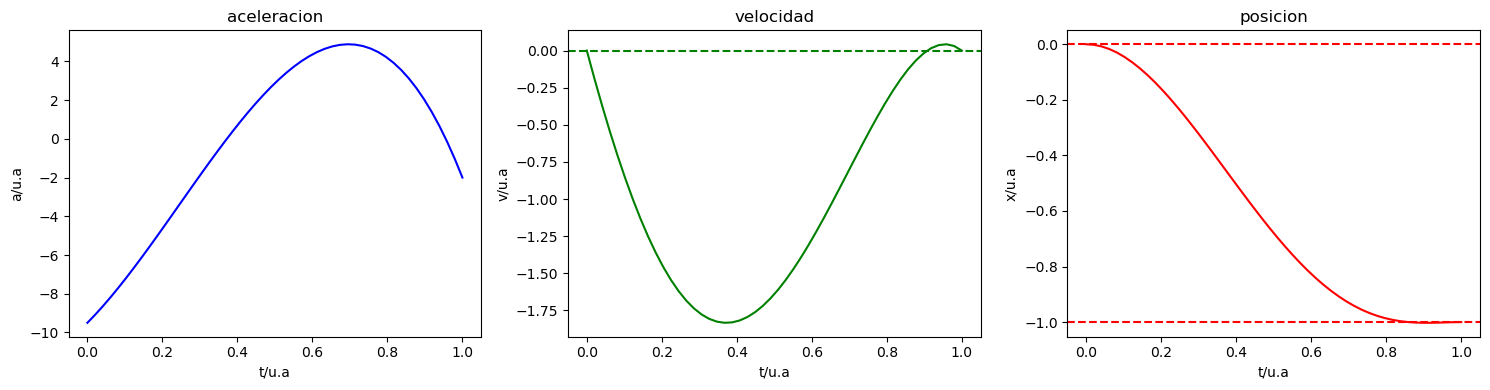

In [657]:
print('Cinematica del remero')
# Crear figura y subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))  # 1 fila, 3 columnas

# Primer plot
axs[0].plot(tt, aa, color='blue')
axs[0].set_title('aceleracion')
axs[0].set_xlabel('t/u.a')
axs[0].set_ylabel('a/u.a')

# Segundo plot
axs[1].plot(tt, vv, color='green')
axs[1].set_title('velocidad')
axs[1].set_xlabel('t/u.a')
axs[1].set_ylabel('v/u.a')
axs[1].axhline(y=0, color='green', linestyle='--')  # Línea horizontal en y=0
# axs[2].axhline(y=0, color='red', linestyle='--')  # Línea horizontal en y=0

# Tercer plot
axs[2].plot(tt, xx, color='red')
axs[2].set_title('posicion')
axs[2].set_xlabel('t/u.a')
axs[2].set_ylabel('x/u.a')
axs[2].axhline(y=-1, color='red', linestyle='--')  # Línea horizontal en y=0
axs[2].axhline(y=0, color='red', linestyle='--')  # Línea horizontal en y=0

# axs[2].set_ylim(-L, 2*L)  # Limitar eje y para que no explote con tan(x)

# Ajustar espacio entre plots
plt.tight_layout()

# Mostrar figura
plt.show()

In [658]:
import numpy as np
import matplotlib.pyplot as plt



# Definir la función f(t, v_b) que representa la EDO
def f(t, v_b, M, m, C_s, rho, A, a, b, c, d):
    term_1 =  (0.5 * C_s * rho * A * v_b**2)
    term_2 = (m * (a * t**3 + b * t**2 + c * t + d))
    return (1 / (M + m))*(-term_1 -term_2)

# Método de Runge-Kutta 4
def runge_kutta_4(f, v_b0, t0, tf, h, M, m, C_s, rho, A, a, b, c, d):
    """
    Resuelve la EDO con el método de Runge-Kutta 4.
    
    f: función que define la EDO (dv_b/dt = f(t, v_b))
    v_b0: valor inicial de v_b en t0
    t0: valor inicial de t
    tf: valor final de t
    h: paso de integración
    """
    # Lista de valores de t y v_b
    t_values = np.arange(t0, tf, h)
    v_b_values = [v_b0]
    a_b_values = []
    # Iteración de Runge-Kutta
    v_b = v_b0
    for t in t_values[:-1]:
        k1 = h * f(t, v_b, M, m, C_s, rho, A, a, b, c, d)
        k2 = h * f(t + 0.5 * h, v_b + 0.5 * k1, M, m, C_s, rho, A, a, b, c, d)
        k3 = h * f(t + 0.5 * h, v_b + 0.5 * k2, M, m, C_s, rho, A, a, b, c, d)
        k4 = h * f(t + h, v_b + k3, M, m, C_s, rho, A, a, b, c, d)
        
        # Actualizar v_b con el promedio ponderado de los k's
        v_b = v_b + (k1 + 2*k2 + 2*k3 + k4) / 6
        v_b_values.append(v_b)
        a_b_values.append(k1)
    a_b_values.append(k4)

    return t_values, np.array(v_b_values), np.array(a_b_values)




In [659]:
# Parámetros de la ecuación
M = 30  # Masa del vehículo (kg)
m = 80   # Masa del objeto (kg)
C_s = 0.005 #0.5 # Coeficiente de arrastre
rho = 1000 # Densidad del agua (kg/m^3)
A = 0.5   # Área frontal (m^2)
T = 1
L=-1
# a, b = -0,33
a,b,c,d = coef_permitidos(a,b,T,L)
# a = 0.1   # Coeficiente para el término t^3
# b = 0.2   # Coeficiente para el término t^2
# c = 0.3   # Coeficiente para el término t
# d = 0.4   # Coeficiente para el término t


In [660]:
# Condiciones iniciales
v_b0 = 10  # velocidad inicial de v_b (m/s)
t0 = 0.0    # tiempo inicial (segundos)
tf = T   # tiempo final (segundos)
h = 0.01     # paso de integración

# Resolver la EDO
t_values, v_b_values, a_b_values = runge_kutta_4(f, v_b0, t0, tf, h, M, m, C_s, rho, A, a, b, c, d)
t_values, v_b_values_m0, a_b_values_m0 = runge_kutta_4(f, v_b0, t0, tf, h, M, 0, C_s, rho, A, a, b, c, d)

a,b,c,d = coef_permitidos(0,0,T,0)
t_values, v_b_values_L0, a_b_values_L0 = runge_kutta_4(f, v_b0, t0, tf, h, M, m, C_s, rho, A, a, b, c, d)

ttt = 0.001
print(aa)

[-9.5        -9.08867904 -8.65216449 -8.19275132 -7.71273449 -7.21440896
 -6.7000697  -6.17201166 -5.63252981 -5.08391912 -4.52847453 -3.96849102
 -3.40626355 -2.84408707 -2.28425656 -1.72906697 -1.18081327 -0.64179041
 -0.11429336  0.39938291  0.89694345  1.37609329  1.83453748  2.26998105
  2.68012903  3.06268647  3.4153584   3.73584986  4.02186589  4.27111153
  4.48129181  4.65011177  4.77527646  4.8544909   4.88546014  4.86588921
  4.79348316  4.66594701  4.48098581  4.2363046   3.92960841  3.55860228
  3.12099125  2.61448036  2.03677464  1.38557914  0.65859888 -0.14646108
 -1.03189572 -2.        ]


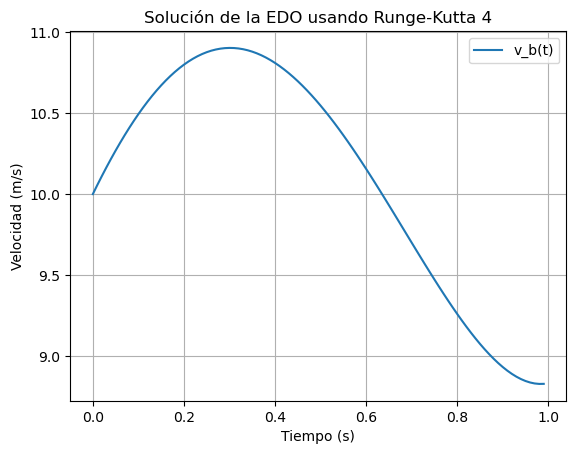

In [661]:
# Graficar la solución
plt.plot(t_values, v_b_values, label='v_b(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Solución de la EDO usando Runge-Kutta 4')
# plt.ylim(0,10)
plt.grid(True)
plt.legend()
plt.show()

Cinematica del remero


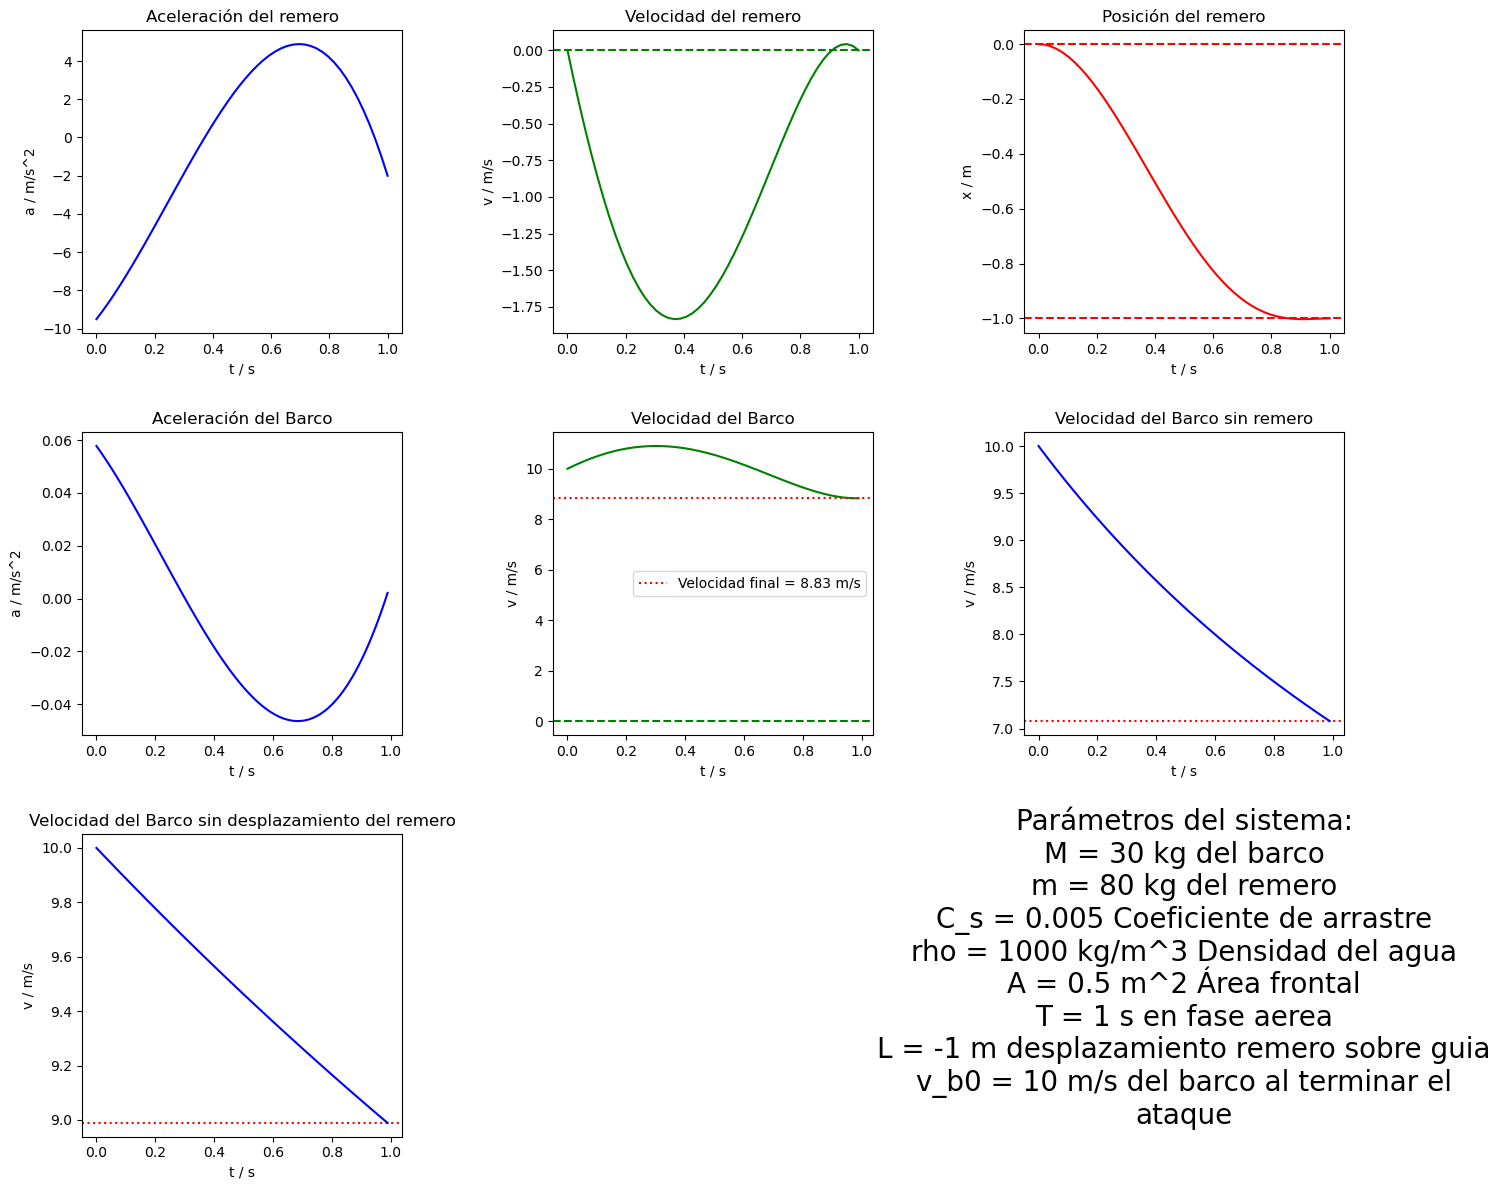

In [ ]:
import matplotlib.pyplot as plt

print('Cinematica del remero')

# Crear figura y subplots (3 filas, 3 columnas)
fig, axs = plt.subplots(3, 3, figsize=(15, 12))  # 3 filas, 3 columnas

# Primer plot (aceleración)
axs[0, 0].plot(tt, aa, color='blue')
axs[0, 0].set_title('Aceleración del remero')
axs[0, 0].set_xlabel('t / s')
axs[0, 0].set_ylabel('a / m/s^2')

# Segundo plot (velocidad)
axs[0, 1].plot(tt, vv, color='green')
axs[0, 1].set_title('Velocidad del remero')
axs[0, 1].set_xlabel('t / s')
axs[0, 1].set_ylabel('v / m/s')
axs[0, 1].axhline(y=0, color='green', linestyle='--')  # Línea horizontal en y=0

# Tercer plot (posición)
axs[0, 2].plot(tt, xx, color='red')
axs[0, 2].set_title('Posición del remero')
axs[0, 2].set_xlabel('t / s')
axs[0, 2].set_ylabel('x / m')
axs[0, 2].axhline(y=-1, color='red', linestyle='--')  # Línea horizontal en y=-1
axs[0, 2].axhline(y=0, color='red', linestyle='--')  # Línea horizontal en y=0

# Cuarto plot (aceleración del barco)
axs[1, 0].plot(t_values, a_b_values , color='blue')
axs[1, 0].set_title('Aceleración del Barco')
axs[1, 0].set_xlabel('t / s')
axs[1, 0].set_ylabel('a / m/s^2')

# Quinto plot (velocidad del barco)
axs[1, 1].plot(t_values, v_b_values, color='green')
v_final = v_b_values[-1]  # Usamos el último valor de la lista de velocidades

# Añadimos la línea punteada en la velocidad final
axs[1, 1].axhline(y=v_final, color='red', linestyle=':', label=f'Velocidad final = {v_final:.2f} m/s')

# Establecemos título, etiquetas y la leyenda
axs[1, 1].set_title('Velocidad del Barco')
axs[1, 1].set_xlabel('t / s')
axs[1, 1].set_ylabel('v / m/s')
axs[1, 1].axhline(y=0, color='green', linestyle='--')  # Línea horizontal en y=0
axs[1, 1].legend()  # Mostrar la leyenda
 # Línea horizontal en y=0

v_final_m0 = v_b_values_m0[-1]  # Usamos el último valor de la lista de velocidades

# Añadimos la línea punteada en la velocidad final
axs[1,2].axhline(y=v_final_m0, color='red', linestyle=':', label=f'Velocidad final = {v_final_m0:.2f} m/s')

axs[1, 2].plot(t_values,v_b_values_m0 , color='blue')
axs[1, 2].set_title('Velocidad del Barco sin remero')
axs[1, 2].set_xlabel('t / s')
axs[1, 2].set_ylabel('v / m/s')


v_final_L0 = v_b_values_L0[-1]  # Usamos el último valor de la lista de velocidades

# Añadimos la línea punteada en la velocidad final
axs[2,0].axhline(y=v_final_L0, color='red', linestyle=':', label=f'Velocidad final = {v_final_m0:.2f} m/s')

axs[2, 0].plot(t_values,v_b_values_L0 , color='blue')
axs[2, 0].set_title('Velocidad del Barco sin desplazamiento del remero')
axs[2, 0].set_xlabel('t / s')
axs[2, 0].set_ylabel('v / m/s')
# Sexto plot (vacío, no se utilizará)
axs[2, 2].axis('off')  # Desactivar la visualización de este subplot
axs[2, 1].axis('off')  # Desactivar la visualización de este subplot

# Séptimo plot (vacío, no se utilizará)
# Octavo plot (vacío, no se utilizará)
# Noveno plot (vacío, no se utilizará)
axs[2, 2].axis('off')  # Desactivar la visualización de este subplot
axs[2, 2].text(0.5, 0.5, f'''Parámetros del sistema:
M = {M} kg del barco
m = {m} kg del remero
C_s = {C_s} Coeficiente de arrastre
rho = {rho} kg/m^3 Densidad del agua
A = {A} m^2 Área frontal
T = {T} s en fase aerea
L = {L} m desplazamiento remero sobre guia
v_b0 = {v_b0} m/s del barco al terminar el ataque
''', fontsize=20, ha='center', va='center', wrap=True)
# Ajustar espacio entre plots
plt.tight_layout()
plt.savefig('grafico_alta_resolucion.png', dpi=300)  # Puedes cambiar el nombre y formato (por ejemplo, .jpg, .png, .pdf)

# Mostrar figura
plt.show()


<Figure size 640x480 with 0 Axes>